In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

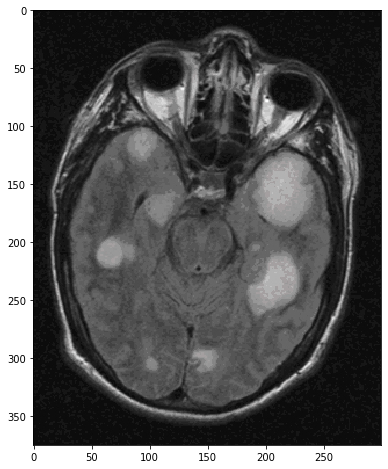

In [15]:
# lendo imagem
original_image = cv2.imread('img.jpeg')
plt.figure(figsize=[8,8])
plt.imshow(original_image)

In [16]:
# Função para converter para escala de cinza
def to_grayscale(img):
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

In [17]:
grayscaled_image = to_grayscale(original_image)

In [18]:
x,thresholded_image = cv2.threshold(grayscaled_image,127,255,cv2.THRESH_BINARY)

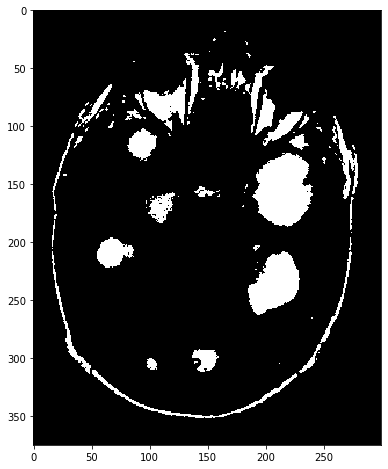

In [19]:
plt.figure(figsize=[8,8])
plt.imshow(thresholded_image,cmap='gray')

In [20]:
def get_flooded_image_using_scanline(image):
    count = 1
    n = False
    shape = image.shape
    img = np.zeros(shape)
    old_x = 0
    for x,y in np.ndindex(shape):
        if x != old_x:
            count += 1
        if(image[x,y]):
            img[x,y]=count
            n = True
            if (image[x-1,y] and x-1>=0):
                img = np.where(img==img[x-1,y], count, img) 
        if not image[x,y] and n:
            count += 2
        old_x = x
    return img

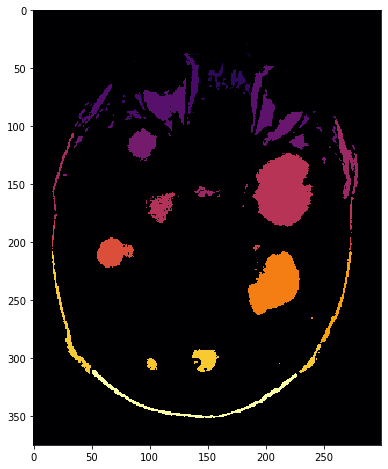

In [21]:
flooded_image = get_flooded_image_using_scanline(thresholded_image)
plt.figure(figsize=[8,8])
plt.imshow(flooded_image, cmap='inferno')

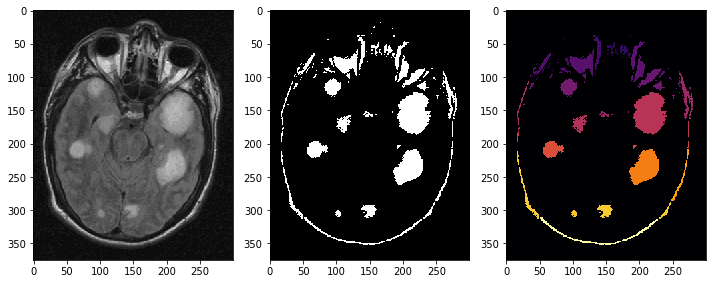

In [22]:
plt.figure(figsize=[10, 10])
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(flooded_image, cmap="inferno")
plt.tight_layout()

# Testes alterando o thresholding

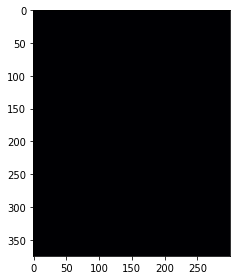

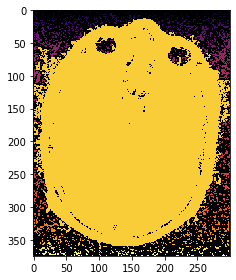

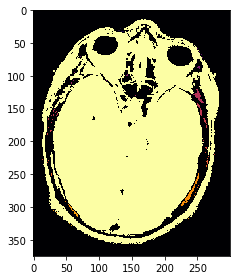

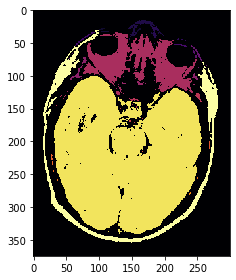

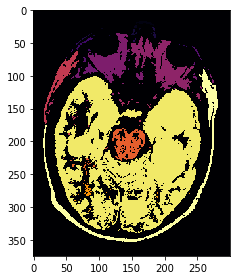

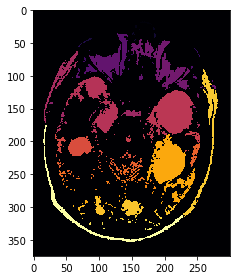

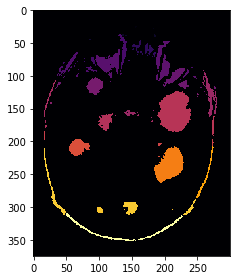

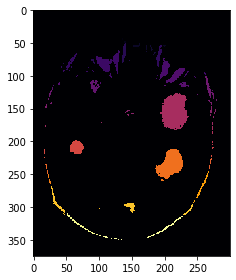

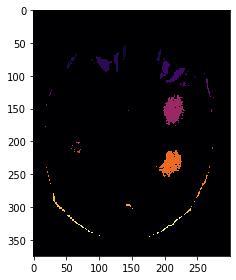

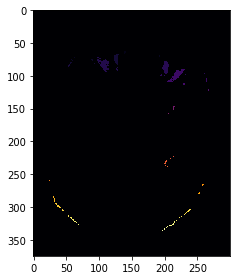

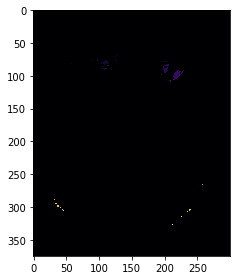

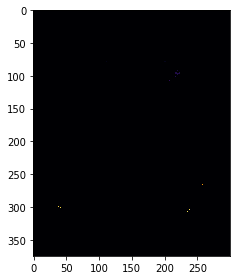

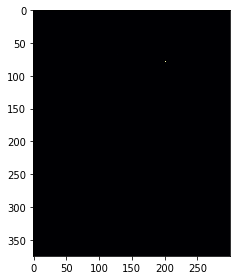

In [25]:
for i in range(0,255,20):
    x,thresholded_image = cv2.threshold(grayscaled_image,i,255,cv2.THRESH_BINARY)
    flooded_image = get_flooded_image_using_scanline(thresholded_image)
    plt.figure(figsize=[4,4])
    plt.imshow(flooded_image, cmap='inferno')
    plt.tight_layout()

# Conclusões

Podemos notar que o thresholding controla o nível de detalhamento e o número de componentes que será representado na imagem. Após a separação em componentes conexos, por exemplo, um especialista poderia adicionar labels na imagem.